import sys
!{sys.executable} -m pip install pydot

In [1]:
import pandas as pd
import scipy
from scipy.stats import skew
import matplotlib.pyplot as plt
import numpy as np
import networkx
import networkx.convert_matrix as nx
import pyvis
import graphviz
from pyvis.network import Network
import pyvis.network as net
import pydot
import random
import time
from matplotlib.ticker import ScalarFormatter

# https://towardsdatascience.com/social-network-analysis-from-theory-to-applications-with-python-d12e9a34c2c7
# https://github.com/ewenme/transfers
# https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
# https://github.com/MridulS/pydata-networkx
# https://datapane.com/u/khuyentran1401/reports/63OQaRk/pyvis-visualize-interactive-network-graphs-in-python/

In [2]:
year = "2011"

In [3]:
BuLi = pd.read_csv(r"DataFootball/"+year+"_german_bundesliga_1.csv")
PL = pd.read_csv(r"DataFootball/"+year+"_english_premier_league.csv")
SA = pd.read_csv(r"DataFootball/"+year+"_italian_serie_a.csv")
PD = pd.read_csv(r"DataFootball/"+year+"_spanish_primera_division.csv")
L1 = pd.read_csv(r"DataFootball/"+year+"_french_ligue_1.csv")
NOS = pd.read_csv(r"DataFootball/"+year+"_portugese_liga_nos.csv")
Ere = pd.read_csv(r"DataFootball/"+year+"_dutch_eredivisie.csv")
EC = pd.read_csv(r"DataFootball/"+year+"_english_championship.csv")
Rus = pd.read_csv(r"DataFootball/"+year+"_russian_premier_liga.csv")

In [4]:
DF = pd.concat([BuLi, PL, SA,
                  PD, L1, NOS, 
                  Ere, EC, Rus],ignore_index=True)

In [5]:
DF.shape

(7483, 12)

In [6]:
DF["club_name"].isin(["Leicester City"])

0       False
1       False
2       False
3       False
4       False
        ...  
7478    False
7479    False
7480    False
7481    False
7482    False
Name: club_name, Length: 7483, dtype: bool

In [7]:
DF

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Bayern Munich,Manuel Neuer,25.0,Goalkeeper,FC Schalke 04,£27.00m,in,Summer,27.00,1 Bundesliga,2011,2011/2012
1,Bayern Munich,Jérôme Boateng,22.0,Centre-Back,Man City,£12.15m,in,Summer,12.15,1 Bundesliga,2011,2011/2012
2,Bayern Munich,Rafinha,25.0,Right-Back,Genoa,£4.95m,in,Summer,4.95,1 Bundesliga,2011,2011/2012
3,Bayern Munich,Nils Petersen,22.0,Centre-Forward,Energie Cottbus,£2.52m,in,Summer,2.52,1 Bundesliga,2011,2011/2012
4,Bayern Munich,Takashi Usami,19.0,Left Winger,Gamba Osaka,Loan fee:£270Th.,in,Summer,0.27,1 Bundesliga,2011,2011/2012
...,...,...,...,...,...,...,...,...,...,...,...,...
7478,FK Ufa,Aleksandr Vasiljev,31.0,Defensive Midfield,Zenit Moskau,Free Transfer,out,NaN,0.00,Premier Liga,2011,2011/2012
7479,FK Ufa,Igor Lavrentjev,22.0,Defensive Midfield,FK Podolje,Loan,out,NaN,0.00,Premier Liga,2011,2011/2012
7480,FK Ufa,Igor Lavrentjev,22.0,Defensive Midfield,FK Ryazan,Loan,out,NaN,0.00,Premier Liga,2011,2011/2012
7481,FK Ufa,Konstantin Ionov,28.0,Centre-Forward,Without Club,-,out,NaN,0.00,Premier Liga,2011,2011/2012


In [8]:
## There is a problem with "double names", e.g. Leicester and Leicester City
def Change(DF,old,new):
    DF.loc[DF["club_name"].isin([old]), ["club_name"]] = new
    DF.loc[DF["club_involved_name"].isin([old]), ["club_involved_name"]] = new
    return DF

In [9]:
old = ["Leicester", "SC Paderborn", "Real Betis", "Sassuolo", "Liverpool", "Watford", "Queens Park Rangers",
       "Brighton & Hove Albion", "Manchester United", "Inter", "UC Sampdoria", "Genoa", "Juventus FC", "Braga",
      "Zenit S-Pb", "Valencia CF", "Marseille", "Espanyol", "Villarreal", "Getafe", "Toulouse", "Cardiff",
      "Paris Saint-Germain", "SL Benfica", "R. Strasbourg", "Racing Club", "Spartak Moscow", "Ajax Amsterdam",
      "Feyenoord Rotterdam", "Dijon FCO", "F. Düsseldorf", "Man City", "E. Frankfurt", "West Ham United",
      "Huddersfield Town", "Charlton", "Nottm Forest", "Swansea", "SS Lazio", "Arsenal FC", "Newcastle",
      "Chelsea FC", "Vitesse Arnheim", "Heerenveen", "Levante", "Brentford", "Bologna", "SV Werder Bremen",
      "Ipswich", "Montpellier", "Bolton", "Marítimo", "Millwall","FC Sochaux-Montbéliard", "Blackpool FC",
       "ES Troyes AC", "Middlesbrough FC", "Vit. Guimarães", "Doncaster", "Norwich City", "Coventry City"]

In [10]:
new = ["Leicester City", "SC Paderborn 07", "Real Betis Balompié", "US Sassuolo", "Liverpool FC", "Watford FC",
      "QPR", "Brighton", "Man Utd", "Inter Milan", "Sampdoria", "Genoa CFC", "Juventus", "SC Braga", 
       "Zenit St. Petersburg", "Valencia", "Olympique Marseille", "RCD Espanyol Barcelona", "Villarreal CF", 
       "Getafe CF", "FC Toulouse", "Cardiff City", "Paris SG", "Benfica", "RC Strasbourg Alsace", "RC Strasbourg Alsace",
      "Spartak", "Ajax", "Feyenoord", "Dijon", "Fortuna Düsseldorf", "Manchester City","Eintracht Frankfurt", "West Ham",
       "Huddersfield","Charlton Athletic", "Nottingham Forest", "Swansea City", "Lazio", "Arsenal", "Newcastle United",
       "Chelsea","Vitesse", "SC Heerenveen", "Levante UD", "Brentford FC", "Bologna FC 1909", "Werder Bremen",
      "Ipswich Town", "Montpellier HSC", "Bolton Wanderers", "CS Marítimo", "Millwall FC","FC Sochaux", "Blackpool",
      "Troyes", "Middlesbrough", "Vitória Guimarães SC", "Doncaster Rovers", "Norwich", "Coventry"]

In [11]:
for i in range(len(new)):
    DF = Change(DF, old[i], new[i])


In [12]:
sum(DF["club_involved_name"].isin(old))

0

## Clean the Data

In [13]:
def DelCol(DF):
    DF = DF.loc[DF["transfer_movement"]=="in"] # only one direction of transfers should be considered
    DF = DF.loc[DF["fee_cleaned"]>0] # only "real" transfers
    del DF["player_name"]
    del DF["transfer_movement"]
    del DF["age"]
    del DF["position"]
    del DF["fee"]
    del DF["league_name"]
    del DF["transfer_period"]
    del DF["year"]
    del DF["season"]
    return(DF)



In [14]:
DF = DelCol(DF)

### Combine multiple transfers between clubs a and b

In [15]:
# now as a function
        
def AddFees(DF): # adds fees of multiple transfers from club a to b
    # output
    DF_out = pd.DataFrame({'club_name' : [],
                         "club_involved_name":[],
                         "fee_cleaned":[]})
    
    for i in range(DF.shape[0]):
        # is this a new match?
        if DF_out.loc[(DF_out["club_name"]== DF["club_name"].iloc[i])&  
                     DF_out["club_involved_name"].isin([DF["club_involved_name"].iloc[i]])].size ==0:
            DF_out = DF_out.append(DF.iloc[i])
        else:
            # add fee value to already existing value
            DF_out["fee_cleaned"].loc[(DF_out["club_name"]== DF["club_name"].iloc[i])&  
                     DF_out["club_involved_name"].isin([DF["club_involved_name"].iloc[i]])] += DF["fee_cleaned"].iloc[i]
            
    return(DF_out)    
        

In [16]:
DF = AddFees(DF)

/home/users/t_wand01/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
DF = DF.reset_index()
DF

,index,club_name,club_involved_name,fee_cleaned
0,0,Bayern Munich,FC Schalke 04,27.000
1,1,Bayern Munich,Manchester City,12.150
2,2,Bayern Munich,Genoa CFC,4.950
3,3,Bayern Munich,Energie Cottbus,2.520
4,4,Bayern Munich,Gamba Osaka,0.270
...,...,...,...,...
759,7409,Dinamo Moscow,Loko Moscow,1.800
760,7411,Dinamo Moscow,KamAZ,0.270
761,7429,Krylya Sovetov Samara,Zenit St. Petersburg,0.630
762,7430,Krylya Sovetov Samara,FC Ashdod,0.450


## Second Data Set: Undirected
Combine both transfer fees from A to B and B to A as one "transfer volume"

In [18]:
DFun =  pd.DataFrame({'club1' : [],
                         "club2":[],
                         "fee_cleaned":[]})

In [19]:
DFun["club1"] = np.minimum(DF['club_name'], DF['club_involved_name']) 
DFun["club2"] = np.maximum(DF['club_name'], DF['club_involved_name']) 

In [20]:
       
def AddFeesUndirected(DF): # adds fees of multiple transfers from club a to b
    # output
    DF_out = pd.DataFrame({'club_name' : [],
                         "club_involved_name":[],
                         "fee_cleaned":[]})
    
    for i in range(DF.shape[0]):
        # is this a new match?
        
        if ((DF_out.loc[(DF_out["club_name"]== DF["club_name"].iloc[i])&  
                     DF_out["club_involved_name"].isin([DF["club_involved_name"].iloc[i]])].size ==0) and 
            (DF_out.loc[(DF_out["club_involved_name"]== DF["club_name"].iloc[i])&  # Neither direction!
                     DF_out["club_name"].isin([DF["club_involved_name"].iloc[i]])].size ==0)):
            DF_out = DF_out.append(DF.iloc[i])
        
        elif (DF_out.loc[(DF_out["club_name"]== DF["club_name"].iloc[i])&  
                     DF_out["club_involved_name"].isin([DF["club_involved_name"].iloc[i]])].size > 0):
            # add fee value to already existing value
            DF_out["fee_cleaned"].loc[(DF_out["club_name"]== DF["club_name"].iloc[i])&  
                     DF_out["club_involved_name"].isin([DF["club_involved_name"].iloc[i]])] += DF["fee_cleaned"].iloc[i]
        
        else: # add the "reversed" fee to existing value
            DF_out["fee_cleaned"].loc[(DF_out["club_involved_name"]== DF["club_name"].iloc[i])&  
                     DF_out["club_name"].isin([DF["club_involved_name"].iloc[i]])] += DF["fee_cleaned"].iloc[i]
            
            
    return(DF_out)    
        

In [21]:
DFun = AddFeesUndirected(DF)

/home/users/t_wand01/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Graphs

In [22]:
G = nx.from_pandas_edgelist(DF, 
                            source = "club_name",
                            target = "club_involved_name",
                            edge_attr=["fee_cleaned"],#, "colour"],
                            create_using=networkx.DiGraph()
                           )

In [23]:
# Teams of individual leagues 19/20
BL_teams = list(set(BuLi["club_name"])) # Bundesliga
BLList = pd.Series(BL_teams)

PLList = pd.Series(list(set(PL["club_name"])))
SAList = pd.Series(list(set(SA["club_name"])))
PDList = pd.Series(list(set(PD["club_name"])))
L1List = pd.Series(list(set(L1["club_name"])))




l = ["red", "blue"]
print(len(G.nodes))
Colours = random.choices(l, k=len(G.nodes))

In [24]:
Colours = ["none"]*len(G.nodes)
j = 0
for i in G.nodes:
    if np.sum(BLList.isin([i])) > 0: # if Bundesliga-Team
        Colours[j] = "red"
    j = j+1

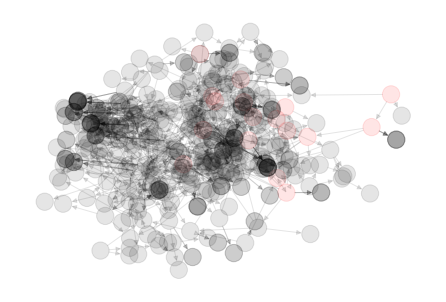

In [25]:
networkx.draw_kamada_kawai(G,node_color = Colours, with_labels=False, alpha=0.1)

In [26]:
def Colour1(node):
    if np.sum(BLList.isin([node])):
        out = "red"
    elif np.sum(PLList.isin([node])):
        out = "blue"
    elif np.sum(SAList.isin([node])):
        out = "green" 
    elif np.sum(PDList.isin([node])):
        out = "yellow"
    elif np.sum(L1List.isin([node])):
        out = "purple"
    else:
        out = "none"
    return(out)

In [27]:
j = 0
for i in G.nodes:
    Colours[j] = Colour1(i)
    j = j+1

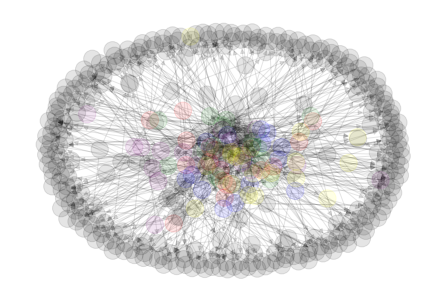

In [28]:
networkx.draw_spring(G,node_color = Colours, with_labels=False, alpha = 0.1)


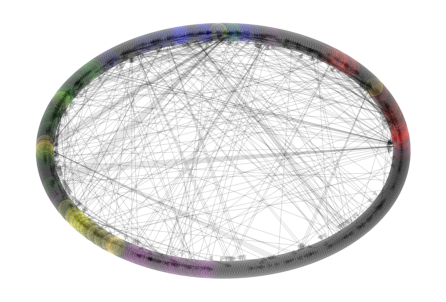

In [29]:
networkx.draw_circular(G,node_color = Colours, with_labels=False, alpha = 0.1)
# one can see blocks of the individual countries + crosslinks
plt.savefig(year+"_Circular")

In [30]:
# Visual inspection: much less "Small World"-connected than before!

In [31]:
net = Network("800px", "800px",notebook=True)
net.from_nx(G)
net.show("Test.html")
# net.save_graph("Test.html")

## Pyvis

In [32]:
g = Network(notebook=True)
G = nx.from_pandas_edgelist(DFun, 
                            source = "club_involved_name",
                            target = "club_name",
                            edge_attr=["fee_cleaned"],#, "colour"],
                            create_using=networkx.DiGraph()
                           )

g.add_nodes(np.array(G.nodes), 
            color = random.choices(["red","grey"], k=len(G.nodes)),
            options = {
                "title":"lel"
            })

In [33]:
def Colour(node):
    # from https://www.hexcolortool.com/#f429ff,0.33
    if np.sum(BLList.isin([node])):
        out = "rgba(244, 15, 11, 0.66)"
    elif np.sum(PLList.isin([node])):
        out = "rgba(41, 155, 255, 0.66)"
    elif np.sum(SAList.isin([node])):
        out = "rgba(41, 255, 77, 0.66)" 
    elif np.sum(PDList.isin([node])):
        out = "rgba(255, 241, 41, 0.66)"
    elif np.sum(L1List.isin([node])):
        out = "rgba(244, 41, 255, 0.66)"
    else:
        out = "rgba(0, 0, 0, 0.22)"
    return(out)

In [34]:
# https://www.hexcolortool.com/#f40f0b,0.33
for node in G.nodes:
    g.add_node(str(node), color = Colour(node), #alpha=0.1,
              options = {"physics":False
              })

In [35]:
#var options = {
# "nodes": {
#    "color": {
#      "border": "rgba(43,124,233,0.46)",
#      "background": "rgba(90,65,252,0.51)"
#    }
#  },
#  "edges": {
#    "color": {
#      "inherit": true
#    },
#    "smooth": false
#  },
#  "physics": {
# "enabled": false,
#    "repulsion": {
#     "springLength": 500
#   },
#    "minVelocity": 0.75,
#    "solver": "repulsion"
#  }
#}

In [36]:
#g.add_edges(DF19["club_name"],DF19["club_involved_name"], value =DF19["fee_cleaned"])

In [37]:
for i in range(DFun.shape[0]):
    g.add_edge(DFun["club_name"].iloc[i], 
              DFun["club_involved_name"].iloc[i],
              value=DFun["fee_cleaned"].iloc[i], 
            kwargs ={
               "physics":False
           })


In [38]:
g.show("Test.html")

In [39]:
g.save_graph(year+"_allLeagues.html")

In [40]:
DFun.loc[DFun["club_name"]=="Vitória Guimarães SC"]

,club_name,club_involved_name,fee_cleaned,index
600,Vitória Guimarães SC,ASO Chlef,0.72,4367.0
601,Vitória Guimarães SC,RC Strasbourg Alsace,0.36,4368.0


In [41]:
DFun.loc[DFun["club_involved_name"]=="Chlef"]

,club_name,club_involved_name,fee_cleaned,index


In [42]:
"Vitória Guimarães SC"

'Vitória Guimarães SC'

In [43]:
DF.shape[0]

764

## Analysis

In [44]:
G_undir = nx.from_pandas_edgelist(DFun, 
                            source = "club_name",
                            target = "club_involved_name",
                            edge_attr="fee_cleaned",
                            create_using=networkx.Graph # or Graph, DiGraph, MultiGraph, MultiDiGraph
                           )

In [45]:
G_dir = nx.from_pandas_edgelist(DF, 
                            source = "club_name",
                            target = "club_involved_name",
                            edge_attr=["fee_cleaned"],#, "colour"],
                            create_using=networkx.DiGraph()
                           )

#### Small World

In [46]:
## Small world

# random reference graph
#G_ref = networkx.algorithms.smallworld.random_reference(G_undir, seed = 10)
#DFcon19 = DFun19.iloc[DFun19["club_name"]!="SC Paderborn 07"]
#DFcon19 = DFcon19.iloc[DFcon19["club_involved_name"]!="SC Paderborn 07"]
SepList19 = ["Vitória Setúbal FC","RKC Waalwijk","Covilhã","Luton Town",
         "Portimonense SC","Vitória Guimarães SC","FK Ufa", "VfL Bochum"]
SepList20 = ["FC Emmen","Sparta Rotterdam","Preston North End","PEC Zwolle",
           "CD Tondela","CD Nacional","FC Paços de Ferreira"]
SepList18 = ["CD Nacional", "CD Feirense","FC St. Gallen", "FC Emmen",
           "GD Chaves", "Heracles Almelo","Pau FC", "Leverkusen U19"]
SepList17 = ["CS Marítimo", "Twente Enschede FC", "Ural Yekaterinburg"]
SepList16 = ["Ipswich Town", "Zira FC", "Ross County", "GD Chaves", 
           "FK Orenburg", "SC Heerenveen", "MVV Maastricht",
           "Rotherham United"]
SepList15= ["Ipswich Town", "SV Ried", "NK Olimpija", "Helmond Sport",
         "FC Utrecht","Lienden","Cruzeiro", "Go Ahead Eagles"]
SepList14 = ["Wolverhampton Wanderers","FC Nantes","FK Ufa", "Gaish", "Shinnik",
          "Cracovia", "Athletic Bilbao", "Brisbane Roar"]
SepList13 = ["Leeds United","Vitória Guimarães SC", "Académica Coimbra", "ADO Den Haag",
          "Rio Ave FC","Belenenses SAD", "Tom Tomsk", "Alianza Lima", "Tigre", 
           "Beira-Mar", "Waterford FC"]
SepList12 = ["Mordovia Saransk","Millwall FC", "FC Girondins Bordeaux", "CD Nacional", 
           "Esbjerg fB", "Roda JC Kerkrade", "Telstar"]

SepList = ["Vitesse", "CD Nacional", "SC Olhanense", "SM Caen", "Indjija",
           "FK Krasnodar","Vitória Guimarães SC"]

DFcon= DFun.drop(DFun[ DFun['club_involved_name'].isin( SepList)].index)

DFcon = DFcon.drop(DFcon[ DFcon['club_name'].isin(SepList)].index)

#networkx.algorithms.smallworld.sigma(G_undir,niter=10, seed=10)

In [47]:
G_undirconnected = nx.from_pandas_edgelist(DFcon, 
                            source = "club_name",
                            target = "club_involved_name",
                            edge_attr="fee_cleaned",
                            create_using=networkx.Graph # or Graph, DiGraph, MultiGraph, MultiDiGraph
                           )




In [48]:
# Quick check: plot
nt = Network('800px', '800px',notebook=True)
#nt.from_nx(G_undirconnected)


for node in G_undirconnected.nodes:
    nt.add_node(str(node), color = Colour(node), #alpha=0.1,
              options = {
              })
    
for i in range(DFcon.shape[0]):
    nt.add_edge(DFcon["club_name"].iloc[i], 
              DFcon["club_involved_name"].iloc[i],
              value=DFcon["fee_cleaned"].iloc[i], 
            kwargs ={
               "physics":False
           })

nt.show('nx.html')
# Is connected!!

In [49]:
nt.save_graph(year+"_connection.html")

In [50]:

start = time.time()

SW = networkx.algorithms.smallworld.sigma(G_undirconnected,niter=20, seed=42)
print(SW)

end = time.time()
print(end - start)

1.8900399384006594
777.7389953136444


#### Degree Distribution

In [51]:
networkx.classes.function.degree_histogram(G_undir)

[0,
 195,
 70,
 49,
 21,
 21,
 19,
 15,
 12,
 11,
 7,
 5,
 5,
 2,
 3,
 1,
 3,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1]

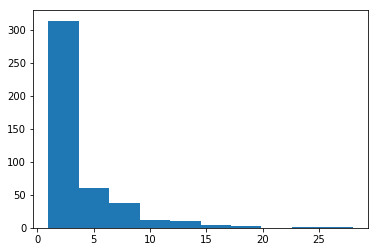

In [52]:
import networkx as nx

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(G_undir)

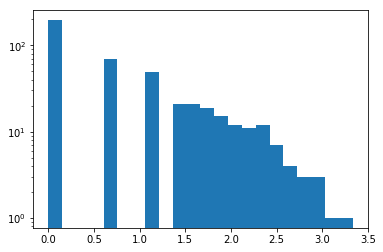

In [53]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(np.log(degrees), bins = int(len(G.nodes())/20), log = True)
    plt.show()

plot_degree_dist(G_undir)

In [54]:
degrees = [G.degree(n) for n in G.nodes()]
log_degrees = np.log(degrees)
print(np.mean(log_degrees), np.std(log_degrees), skew(log_degrees))


0.8051114286225237 0.8625422025761906 0.6789622477125625


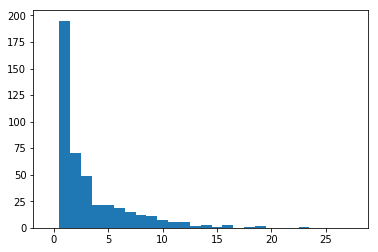

In [55]:
plt.hist(degrees, bins = np.arange(-0.5,max(degrees)+0.5,1))
plt.show()

In [56]:
degree_dist = np.zeros(max(degrees)+1)

In [57]:
for i in range(max(degrees)):
    degree_dist[i] = np.sum(np.array(degrees) == i)

In [58]:
degree_dist

array([  0., 195.,  70.,  49.,  21.,  21.,  19.,  15.,  12.,  11.,   7.,
         5.,   5.,   2.,   3.,   1.,   3.,   0.,   1.,   2.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.])

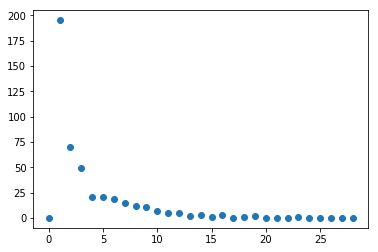

In [59]:
plt.scatter(np.arange(max(degrees)+1), degree_dist)
plt.show()

#### in-degree

0 64.0
1 209.0
2 77.0
3 44.0
4 21.0
5 10.0
6 11.0
7 5.0
8 0.0
9 1.0
10 0.0
11 0.0
12 1.0
13 1.0


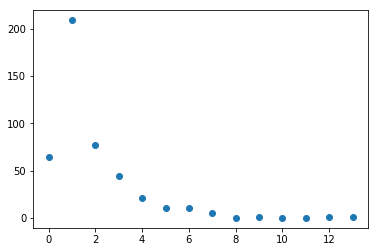

In [60]:
indegrees = [G_dir.in_degree(n) for n in G_dir.nodes()]
indegree_dist = np.zeros(max(indegrees)+1)
for i in range(max(indegrees)+1):
    indegree_dist[i] = np.sum(np.array(indegrees) == i)
    print(i,indegree_dist[i])
plt.scatter(np.arange(max(indegrees)+1), indegree_dist)
plt.show()

In [61]:
# calculate for everything without 0 (artifact because of limited data)

In [62]:
indegree_dist

array([ 64., 209.,  77.,  44.,  21.,  10.,  11.,   5.,   0.,   1.,   0.,
         0.,   1.,   1.])

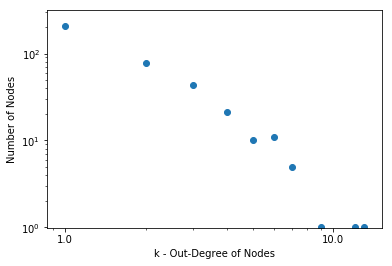

In [63]:
x = np.arange(1,max(indegrees)+1)
y = indegree_dist[1:]


plt.xscale('log')
plt.yscale('log')
plt.scatter(x, y)
plt.ylim(0.99, 1.5*max(y))
#plt.plot(np.exp(np.arange(0,3,0.01)), 
 #       np.exp(reg.predict(np.arange(0,3,0.01).reshape(-1, 1))), color="red")

ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel("k - Out-Degree of Nodes")
plt.ylabel("Number of Nodes")
plt.savefig(year+"_InNodeDistrPlot")

plt.show()

In [64]:
# Probably not an argument against Power-Law, but also probably not enough data with really many connections

In [65]:
#### Out-Degree

In [66]:
outdegrees = [G_dir.out_degree(n) for n in G_dir.nodes()]
outdegrees_dist = np.zeros(max(outdegrees)+1)
for i in range(max(outdegrees)+1):
    outdegrees_dist[i] = np.sum(np.array(outdegrees) == i)
    print(i,outdegrees_dist[i])


0 291.0
1 18.0
2 16.0
3 24.0
4 22.0
5 18.0
6 16.0
7 9.0
8 6.0
9 8.0
10 8.0
11 1.0
12 2.0
13 3.0
14 1.0
15 0.0
16 0.0
17 1.0


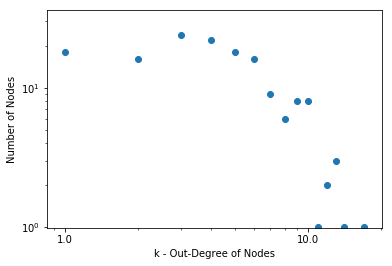

In [67]:
x = np.arange(1,max(outdegrees)+1)
y = outdegrees_dist[1:]


plt.xscale('log')
plt.yscale('log')
plt.scatter(x, y)
plt.ylim(0.99, 1.5*max(y))
#plt.plot(np.exp(np.arange(0,3,0.01)), 
 #       np.exp(reg.predict(np.arange(0,3,0.01).reshape(-1, 1))), color="red")

ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel("k - Out-Degree of Nodes")
plt.ylabel("Number of Nodes")
plt.savefig(year+"_OutNodeDistrPlot")

plt.show()

### Clustering

In [68]:
G_dir = nx.from_pandas_edgelist(DF, 
                            source = "club_involved_name",
                            target = "club_name",
                            edge_attr="fee_cleaned",
                            create_using=networkx.DiGraph # or Graph, DiGraph, MultiGraph, MultiDiGraph
                           )

In [69]:
networkx.algorithms.hierarchy.flow_hierarchy(G_dir)

0.8324607329842932

In [70]:
# Regular Clustering

Clust = networkx.algorithms.cluster.clustering(G_dir)
BDN_C = np.mean(list(Clust.values()))
print(BDN_C)

0.020375159419652046


In [71]:
WeightClust = networkx.algorithms.cluster.clustering(G_dir, weight = "fee_cleaned")

In [72]:
# Weighted Clustering
# https://journals.aps.org/pre/abstract/10.1103/PhysRevE.76.026107

WDN_C = np.mean(list(WeightClust.values()))  ## ?
print(WDN_C)

0.0009432199674889012


In [73]:
NumberNodes = len(list(G_dir.nodes))
NumberEdges = len(list(G_dir.edges))

p = 2*NumberEdges / (NumberNodes*(NumberNodes-1)) # p. 19 in Large Scale Structures....
print(p)

0.007768490838468265


Kind of like Eq. (11) in https://journals.aps.org/pre/abstract/10.1103/PhysRevE.76.026107
it holds that Clustering_WDN < Clustering_BDN ~ p_random

### Calculate Node Strength Distribution

In [74]:
l=0
for n in G.nodes():
    l = l+1
print(l)
print(len(G.nodes()))
print(int(len(G.nodes())/20))

444
444
22


0.023 151.7


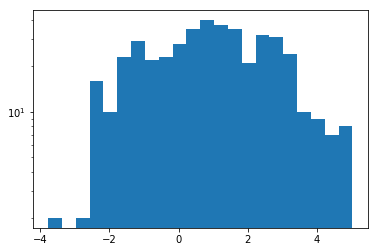

In [75]:
# Roughly symmetrical around 1.5?
def plot_strength_dist(G):
    strengths = [G.degree(n, weight="fee_cleaned") for n in G.nodes()]
    plt.hist(np.log(strengths), bins = int(len(G.nodes())/20), log = True)
    print(min(strengths), max(strengths))
    plt.savefig(year+"_LogStrengthDistrib")
    plt.show()
plot_strength_dist(G_dir)



In [76]:
strengths = [G.degree(n, weight="fee_cleaned") for n in G.nodes()]
log_strengths = np.log(strengths)
print(np.mean(log_strengths), np.std(log_strengths), skew(log_strengths))

0.9264559170001534 1.8081123783109911 -0.02152698934723668


### Disparity for undirected Network

In [77]:
A = networkx.linalg.graphmatrix.adjacency_matrix(G_undir, weight = "fee_cleaned")

In [78]:
print(A.shape)

(444, 444)


In [79]:
## Sanity check: should be 0
print(np.sum(A[i,i] for i in range(A.shape[0])))

0.0


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [80]:
print(DF)

     index              club_name    club_involved_name  fee_cleaned
0        0          Bayern Munich         FC Schalke 04       27.000
1        1          Bayern Munich       Manchester City       12.150
2        2          Bayern Munich             Genoa CFC        4.950
3        3          Bayern Munich       Energie Cottbus        2.520
4        4          Bayern Munich           Gamba Osaka        0.270
..     ...                    ...                   ...          ...
759   7409          Dinamo Moscow           Loko Moscow        1.800
760   7411          Dinamo Moscow                 KamAZ        0.270
761   7429  Krylya Sovetov Samara  Zenit St. Petersburg        0.630
762   7430  Krylya Sovetov Samara             FC Ashdod        0.450
763   7431  Krylya Sovetov Samara                Naftan        0.068

[764 rows x 4 columns]


In [81]:
print(A)

  (0, 1)	27.0
  (0, 2)	12.15
  (0, 3)	4.95
  (0, 4)	2.52
  (0, 5)	0.27
  (0, 51)	4.5
  (1, 0)	27.0
  (1, 11)	3.6
  (1, 15)	1.35
  (1, 16)	1.35
  (1, 51)	0.9
  (1, 55)	0.068
  (1, 70)	0.45
  (1, 359)	0.36
  (2, 0)	12.15
  (2, 90)	31.73
  (2, 113)	36.0
  (2, 115)	3.38
  (2, 116)	8.280000000000001
  (2, 129)	2.03
  (2, 133)	10.8
  (2, 136)	3.4200000000000004
  (2, 273)	0.9
  (2, 281)	1.35
  (3, 0)	4.95
  :	:
  (431, 99)	4.05
  (431, 240)	1.08
  (432, 278)	11.61
  (432, 433)	4.5
  (432, 434)	3.6
  (432, 435)	0.855
  (432, 436)	0.45
  (432, 437)	7.2
  (433, 432)	4.5
  (434, 432)	3.6
  (435, 432)	0.855
  (436, 432)	0.45
  (437, 294)	1.8
  (437, 432)	7.2
  (437, 438)	17.1
  (437, 439)	3.87
  (437, 440)	0.27
  (438, 437)	17.1
  (439, 437)	3.87
  (440, 437)	0.27
  (441, 74)	0.63
  (441, 442)	0.45
  (441, 443)	0.068
  (442, 441)	0.45
  (443, 441)	0.068


In [82]:
strengths_undir = [G_undir.degree(n, weight="fee_cleaned") for n in G_undir.nodes()]

In [83]:
strengths_undir

[51.39000000000001,
 35.078,
 110.03999999999999,
 115.63499999999998,
 2.52,
 0.27,
 10.103,
 8.684999999999999,
 5.04,
 0.203,
 18.279000000000003,
 20.879999999999995,
 16.92,
 26.009999999999998,
 0.234,
 2.16,
 1.71,
 1.98,
 26.329999999999995,
 3.96,
 3.6,
 102.47,
 0.45,
 2.3850000000000002,
 1.53,
 0.36,
 0.909,
 3.7800000000000002,
 0.99,
 0.765,
 0.405,
 2.7,
 0.36,
 0.18,
 10.395,
 0.09,
 51.998000000000005,
 8.370000000000001,
 5.4,
 1.35,
 96.26,
 3.87,
 26.145,
 2.07,
 1.62,
 2.2500000000000004,
 1.71,
 21.599999999999998,
 12.249,
 0.36,
 6.029999999999999,
 18.99,
 0.45,
 0.18,
 0.18,
 1.0679999999999998,
 0.158,
 5.31,
 1.35,
 19.400000000000002,
 0.18,
 1.26,
 5.291999999999999,
 1.8,
 82.57000000000001,
 5.45,
 5.9670000000000005,
 4.435,
 0.225,
 35.195,
 5.4,
 0.45,
 0.837,
 0.27,
 15.39,
 67.58600000000001,
 8.549999999999999,
 5.22,
 3.6,
 3.15,
 10.161,
 3.1500000000000004,
 1.35,
 0.495,
 0.27,
 0.9,
 0.09,
 0.252,
 5.31,
 0.378,
 125.89099999999999,
 12.623,
 

In [84]:
j = 0
Y = np.zeros(A.shape[0])
for i in G_undir.nodes:
    row = (A[j,:]/np.sum(A[j,:]))
    row = row.toarray()
    Y[j] = np.sum(row**2)
    j = j+1
    
    
print(j)

444


In [85]:
degrees_undir = [G_undir.degree(n) for n in G_undir.nodes()]

In [86]:
import sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.log(degrees_undir).reshape(-1, 1), np.log(Y).reshape(-1, 1))

In [87]:
print(reg.coef_[0]) # reasonably close to -1?


[-0.67739343]


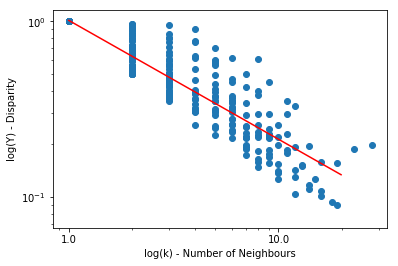

In [88]:


x = degrees_undir
y = Y

plt.scatter(x, y)
plt.xscale('log')
plt.yscale('log')

plt.plot(np.exp(np.arange(0,3,0.01)), 
        np.exp(reg.predict(np.arange(0,3,0.01).reshape(-1, 1))), color="red")

ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel("log(k) - Number of Neighbours")
plt.ylabel("log(Y) - Disparity")
plt.savefig(year+"_DisparityPlot")

plt.show()


## Conclusion
Save some important results as an exported txt

In [89]:
Out = pd.DataFrame(data={"Year":year,
                         "NumberClubs": NumberNodes,
                         "NumberTransfers": NumberEdges,
                         "SmallWorld": SW,
                        "DisparityExponent": reg.coef_[0],
                         "BDN_RandomClusteringExpercation": p,
                        "BDN_Clustering": BDN_C,
                        "WDN_Clustering":WDN_C,
                        "MeanLogStrength":np.mean(log_strengths), 
                         "StdLogStrength":np.std(log_strengths), 
                         "SkewnessLogStrength":skew(log_strengths)})

In [90]:
Out.to_csv(year+"_results.csv",index=False)

In [91]:
Out

,Year,NumberClubs,NumberTransfers,SmallWorld,DisparityExponent,BDN_RandomClusteringExpercation,BDN_Clustering,WDN_Clustering,MeanLogStrength,StdLogStrength,SkewnessLogStrength
0,2011,444,764,1.89004,-0.677393,0.007768,0.020375,0.000943,0.926456,1.808112,-0.021527
